## LTE Traffic Analysis for L1800 F1 ,L1800 F2 ,L800 and L2100 

The task is to understand which LTE Bands serve VoLTE for a given network cluster.
The analysis will guide RNPO Engineers on which LTE bands they are likely to optimize further.

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import ScalarFormatter
import warnings
warnings.filterwarnings('ignore')


In [166]:
lte_data =pd.read_excel("C:/Users/PENTACOM LTD/Desktop/ML/Datasets/LTE Traffic Analysis.xlsx")
lte_data.head(5)

,Period start time,LNCEL,Sector,LNCEL name,Cell Avail,Cell Avail excl BLU,VoLTE total traffic,"PDCP SDU Volume, DL","PDCP SDU Volume, UL","RRC connected users, max",...,Inter RAT Total HO SR,E-UTRAN InterRAT HO SR,Inter RAT HO Preparation SR,E-UTRAN Load Balancing HO SR,IRAT HO tot SR UTRAN SRVCC,"Inter RAT HO SR, UTRAN, SRVCC","Inter RAT HO FR, UTRAN, SRVCC",IRAT HO tot SR GERAN SRVCC,"Inter RAT HO SR, GERAN, SRVCC","Inter RAT HO FR, GERAN, SRVCC"
0,2024-05-06,12865_WN_LWL21274,0,12865_WN_LWL21274-0,77.248843,99.998502,58.551389,70765.841405,11600.276719,121,...,75.862069,95.652174,79.310345,99.915966,75.862069,95.652174,0.0,NaN,NaN,NaN
1,2024-05-06,12865_WN_LWL21274,1,12865_WN_LWL21274-1,78.033565,100.000000,91.883333,78267.565346,11502.127938,197,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0,NaN,NaN,NaN
2,2024-05-06,12865_WN_LWL21274,10,12865_WN_LWL21274-10,76.458333,99.998486,4.283333,12612.988745,1878.255262,25,...,42.857143,100.000000,42.857143,100.000000,42.857143,100.000000,0.0,NaN,NaN,NaN
3,2024-05-06,12865_WN_LWL21274,11,12865_WN_LWL21274-11,77.314815,99.998503,10.760833,16286.997862,3548.193751,55,...,86.666667,89.655172,96.666667,100.000000,86.666667,89.655172,0.0,NaN,NaN,NaN
4,2024-05-06,12865_WN_LWL21274,12,12865_WN_LWL21274-12,81.042824,99.998572,16.674444,29706.984538,3820.268225,65,...,93.548387,93.548387,100.000000,99.938480,93.548387,93.548387,0.0,NaN,NaN,NaN


In [167]:
lte_data=lte_data.drop (columns =['Period start time','Inter RAT HO FR, UTRAN, SRVCC','IRAT HO tot SR GERAN SRVCC',
                                  'Inter RAT HO SR, GERAN, SRVCC','Inter RAT HO FR, GERAN, SRVCC'])
lte_data.head(4)

,LNCEL,Sector,LNCEL name,Cell Avail,Cell Avail excl BLU,VoLTE total traffic,"PDCP SDU Volume, DL","PDCP SDU Volume, UL","RRC connected users, max",Avg RRC conn UE,...,inter eNB E-UTRAN HO prep SR X2,"E-UTRAN tot HO SR, inter eNB S1","E-UTRAN HO SR, inter eNB S1","E-UTRAN HO Prep SR, inter eNB S1",Inter RAT Total HO SR,E-UTRAN InterRAT HO SR,Inter RAT HO Preparation SR,E-UTRAN Load Balancing HO SR,IRAT HO tot SR UTRAN SRVCC,"Inter RAT HO SR, UTRAN, SRVCC"
0,12865_WN_LWL21274,0,12865_WN_LWL21274-0,77.248843,99.998502,58.551389,70765.841405,11600.276719,121,58.625459,...,100.0,97.481722,98.441345,99.025183,75.862069,95.652174,79.310345,99.915966,75.862069,95.652174
1,12865_WN_LWL21274,1,12865_WN_LWL21274-1,78.033565,100.000000,91.883333,78267.565346,11502.127938,197,81.714398,...,100.0,97.413479,99.183976,98.214936,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2,12865_WN_LWL21274,10,12865_WN_LWL21274-10,76.458333,99.998486,4.283333,12612.988745,1878.255262,25,5.523346,...,100.0,NaN,NaN,NaN,42.857143,100.000000,42.857143,100.000000,42.857143,100.000000
3,12865_WN_LWL21274,11,12865_WN_LWL21274-11,77.314815,99.998503,10.760833,16286.997862,3548.193751,55,10.042474,...,100.0,NaN,NaN,NaN,86.666667,89.655172,96.666667,100.000000,86.666667,89.655172


In [168]:
lte_data.rename(columns ={'VoLTE total traffic' : 'VoLTE_total_traffic'} ,inplace= True )
lte_data.head(1)


,LNCEL,Sector,LNCEL name,Cell Avail,Cell Avail excl BLU,VoLTE_total_traffic,"PDCP SDU Volume, DL","PDCP SDU Volume, UL","RRC connected users, max",Avg RRC conn UE,...,inter eNB E-UTRAN HO prep SR X2,"E-UTRAN tot HO SR, inter eNB S1","E-UTRAN HO SR, inter eNB S1","E-UTRAN HO Prep SR, inter eNB S1",Inter RAT Total HO SR,E-UTRAN InterRAT HO SR,Inter RAT HO Preparation SR,E-UTRAN Load Balancing HO SR,IRAT HO tot SR UTRAN SRVCC,"Inter RAT HO SR, UTRAN, SRVCC"
0,12865_WN_LWL21274,0,12865_WN_LWL21274-0,77.248843,99.998502,58.551389,70765.841405,11600.276719,121,58.625459,...,100.0,97.481722,98.441345,99.025183,75.862069,95.652174,79.310345,99.915966,75.862069,95.652174


Classifying VoLTE Traffic into Erlang Class groups using ranges.
    ***You are free to choose a given range for your analysis****

In [169]:
def VoLTE(VoLTE_total_traffic):
    
    if VoLTE_total_traffic >= 90:

        Erlang = 'Erlang Class 1 \n(>90)'

    elif VoLTE_total_traffic >= 70 and VoLTE_total_traffic <90:

        Erlang = 'Erlang Class 2 \n(70-90)'

    elif VoLTE_total_traffic >= 50 and VoLTE_total_traffic <70:

        Erlang = 'Erlang Class 3 \n(50-70)'

    elif VoLTE_total_traffic >= 30 and VoLTE_total_traffic <50:

        Erlang = 'Erlang Class 4 \n(30-50)'
        
    elif VoLTE_total_traffic >= 15 and VoLTE_total_traffic <30:

        Erlang = 'Erlang Class 5 \n(15-30)'

    else:

        Erlang = 'Erlang Class 6 \n(<15)'

    return Erlang

In [170]:
lte_data['Erlang Class'] =' '
for i in range(len(lte_data)):
    lte_data['Erlang Class'].loc[i] = VoLTE(lte_data['VoLTE_total_traffic'].loc[i])

In [171]:
lte_data.head(3)

,LNCEL,Sector,LNCEL name,Cell Avail,Cell Avail excl BLU,VoLTE_total_traffic,"PDCP SDU Volume, DL","PDCP SDU Volume, UL","RRC connected users, max",Avg RRC conn UE,...,"E-UTRAN tot HO SR, inter eNB S1","E-UTRAN HO SR, inter eNB S1","E-UTRAN HO Prep SR, inter eNB S1",Inter RAT Total HO SR,E-UTRAN InterRAT HO SR,Inter RAT HO Preparation SR,E-UTRAN Load Balancing HO SR,IRAT HO tot SR UTRAN SRVCC,"Inter RAT HO SR, UTRAN, SRVCC",Erlang Class
0,12865_WN_LWL21274,0,12865_WN_LWL21274-0,77.248843,99.998502,58.551389,70765.841405,11600.276719,121,58.625459,...,97.481722,98.441345,99.025183,75.862069,95.652174,79.310345,99.915966,75.862069,95.652174,Erlang Class 3 \n(50-70)
1,12865_WN_LWL21274,1,12865_WN_LWL21274-1,78.033565,100.000000,91.883333,78267.565346,11502.127938,197,81.714398,...,97.413479,99.183976,98.214936,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,Erlang Class 1 \n(>90)
2,12865_WN_LWL21274,10,12865_WN_LWL21274-10,76.458333,99.998486,4.283333,12612.988745,1878.255262,25,5.523346,...,NaN,NaN,NaN,42.857143,100.000000,42.857143,100.000000,42.857143,100.000000,Erlang Class 6 \n(<15)


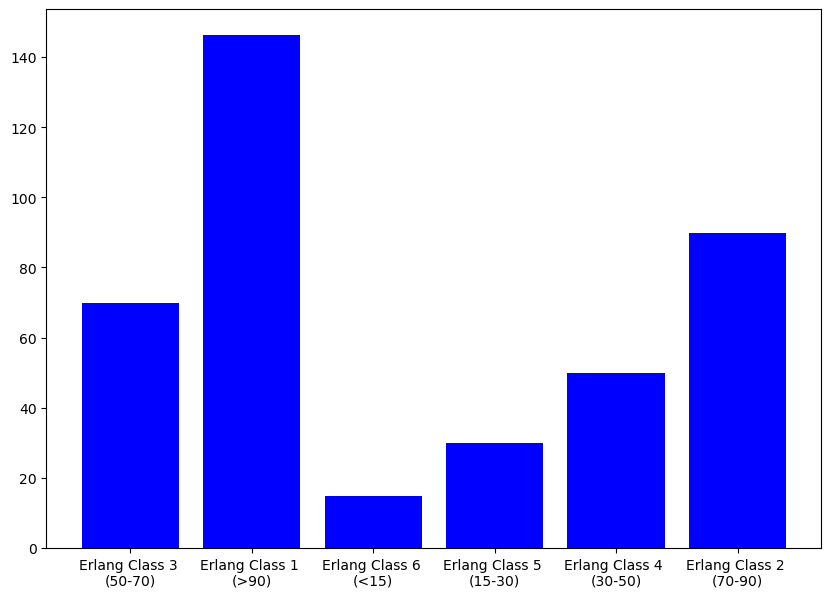

In [172]:
plt.figure(figsize = (10, 7))
plt.bar(lte_data['Erlang Class'],lte_data['VoLTE_total_traffic'], color = 'blue')
plt.show()

From the VoLTE graph , conclusions can be made that Erlang Class 1 is the highest.

##### 1.We need to find out which LTE Band combinations are used for that case.
##### 2. Further analysis which areas use those bands and map out in the given area.

In [173]:
lte_data ['LTE_Bands'] = ' '

Here we are mapping out for given sectors of the eNodeB with LTE Bands they serve 

### Note that Further Analysis for each sector and LTE Band is needed to complete the analysis

In [174]:
def Band_Mapping(Sector):
    
    if Sector == 0 or Sector == 1 or Sector == 2:
        LTE_Bands = 'L1800 F1'

    elif Sector == 4 or Sector == 5 or Sector == 6 :
        LTE_Bands = 'L800'

    elif Sector == 10 or Sector== 11 or Sector == 12:
        LTE_Bands = 'L1800 F2'
       
    else:

        LTE_Bands = 'L2100'

    return LTE_Bands

for i in range(len(lte_data)):
    lte_data['LTE_Bands'].loc[i] = Band_Mapping(lte_data['Sector'].loc[i])


In [175]:
lte_data.head()

,LNCEL,Sector,LNCEL name,Cell Avail,Cell Avail excl BLU,VoLTE_total_traffic,"PDCP SDU Volume, DL","PDCP SDU Volume, UL","RRC connected users, max",Avg RRC conn UE,...,"E-UTRAN HO SR, inter eNB S1","E-UTRAN HO Prep SR, inter eNB S1",Inter RAT Total HO SR,E-UTRAN InterRAT HO SR,Inter RAT HO Preparation SR,E-UTRAN Load Balancing HO SR,IRAT HO tot SR UTRAN SRVCC,"Inter RAT HO SR, UTRAN, SRVCC",Erlang Class,LTE_Bands
0,12865_WN_LWL21274,0,12865_WN_LWL21274-0,77.248843,99.998502,58.551389,70765.841405,11600.276719,121,58.625459,...,98.441345,99.025183,75.862069,95.652174,79.310345,99.915966,75.862069,95.652174,Erlang Class 3 \n(50-70),L1800 F1
1,12865_WN_LWL21274,1,12865_WN_LWL21274-1,78.033565,100.000000,91.883333,78267.565346,11502.127938,197,81.714398,...,99.183976,98.214936,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,Erlang Class 1 \n(>90),L1800 F1
2,12865_WN_LWL21274,10,12865_WN_LWL21274-10,76.458333,99.998486,4.283333,12612.988745,1878.255262,25,5.523346,...,NaN,NaN,42.857143,100.000000,42.857143,100.000000,42.857143,100.000000,Erlang Class 6 \n(<15),L1800 F2
3,12865_WN_LWL21274,11,12865_WN_LWL21274-11,77.314815,99.998503,10.760833,16286.997862,3548.193751,55,10.042474,...,NaN,NaN,86.666667,89.655172,96.666667,100.000000,86.666667,89.655172,Erlang Class 6 \n(<15),L1800 F2
4,12865_WN_LWL21274,12,12865_WN_LWL21274-12,81.042824,99.998572,16.674444,29706.984538,3820.268225,65,17.417955,...,NaN,NaN,93.548387,93.548387,100.000000,99.938480,93.548387,93.548387,Erlang Class 5 \n(15-30),L1800 F2


In [188]:
pivot_df = lte_data.pivot_table(values = 'VoLTE_total_traffic', 
          index = 'Erlang Class', columns = 'LTE_Bands', 
          aggfunc = 'mean')

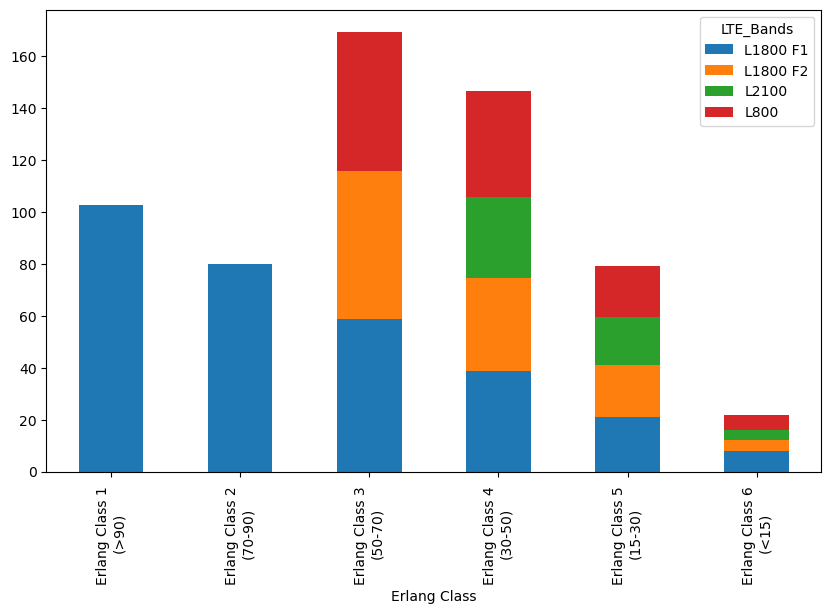

In [189]:
fig, ax = plt.subplots(figsize = (10, 6))
colors = list(mcolors.TABLEAU_COLORS.values())
pivot_df.plot(kind = 'bar', stacked = True, ax = ax, color = colors)
plt.show()

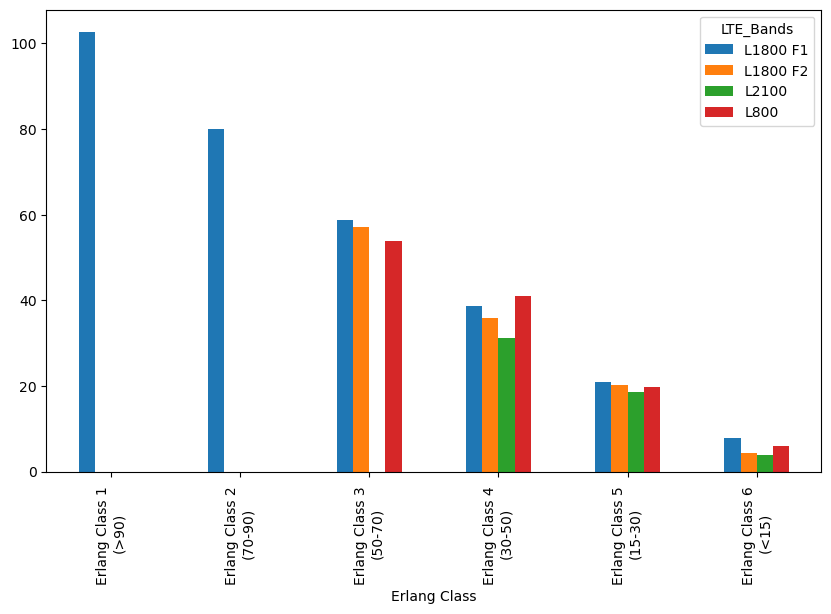

In [190]:
fig, ax = plt.subplots(figsize = (10, 6))
colors = list(mcolors.TABLEAU_COLORS.values())
pivot_df.plot(kind = 'bar', stacked = False, ax = ax, color = colors)
plt.show()